<a href="https://colab.research.google.com/github/apinee/SQL_Injection/blob/main/SQL_Injection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQLi Dataset Exploration
**Objectives**</br>

Learn about SQL injections.
Explore SQLi techniques
SQL injection categories
</br>
There are three main categories of SQL injection:


1.   In-band
2.   Out-band
3.   Inferential



In the following sections, you'll learn that each type describes how a SQL injection is initiated and how it returns the results of the attack.

**In-band SQL injection**</br>
In-band, or classic, SQL injection is the most common type. An in-band injection is one that uses the same communication channel to launch the attack and gather the results.

For example, this might occur in the search box of a retailer's website that lets customers find products to buy. If the search box is vulnerable to injection, an attacker could enter a malicious query that would be executed in the database, causing it to return sensitive information like user passwords. The data that's returned is displayed back in the search box where the attack was initiated.

**Out-of-band SQL injection**</br>
An out-of-band injection is one that uses a different communication channel to launch the attack and gather the results.

For example, an attacker could use a malicious query to create a connection between a vulnerable website and a database they control. This separate channel would allow them to bypass any security controls that are in place on the website's server, allowing them to steal sensitive data

Note: Out-of-band injection attacks are very uncommon because they'll only work when certain features are enabled on the target server.

**Inferential SQL injection**</br>
Inferential SQL injection occurs when an attacker is unable to directly see the results of their attack. Instead, they can interpret the results by analyzing the behavior of the system.

For example, an attacker might perform a SQL injection attack on the login form of a website that causes the system to respond with an error message. Although sensitive data is not returned, the attacker can figure out the database's structure based on the error. They can then use this information to craft attacks that will give them access to sensitive data or to take control of the system.

**Theory**</br>
The SQL injection is a code injection technique used to attack data-driven applications, in which malicious SQL statements are inserted in a way that it is executed.

There are diffrent types of SQL injection attacks:

Union-based SQLi: 2 or more SQLi queries combined.
Error-based SQLi: invalid query input that causes failure
Blind-based SQLi: attacker choses moves based ib questions asked for the database (a type of DDos attacks) and it's the worse between the 3 of them.

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [1]:

import pandas as pd

# Load the CSV file into a pandas DataFrame.
# Replace 'your_file.csv' with the actual path to your CSV file.
try:
    df = pd.read_csv('/content/Modified_SQL_Dataset.csv')
    # Display the DataFrame.
    display(df)
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
...,...,...
30914,DELETE FROM door WHERE grow = 'small',0
30915,DELETE FROM tomorrow,0
30916,SELECT wide ( s ) FROM west,0
30917,SELECT * FROM ( SELECT slide FROM breath ),0


In [2]:
df.size

61838

In [5]:
df.shape

(30919, 2)

In [9]:

label_counts = df['Label'].value_counts()
print(label_counts)


Label
0    19537
1    11382
Name: count, dtype: int64


As we can see there is a embalance in the data.
so we will delete some '0' labeled Query

In [16]:

label_counts = df['Label'].value_counts()
print(label_counts)

# Find indices of queries labeled as 0
indices_to_remove = df[df['Label'] == 0].index

# Calculate how many 0-labeled queries to remove
num_to_remove = len(indices_to_remove) - 11382

# Randomly select indices to remove
if num_to_remove > 0:
    indices_to_remove = np.random.choice(indices_to_remove, num_to_remove, replace=False)
    df = df.drop(indices_to_remove)

# Verify the count of 0-labeled queries
label_counts = df['Label'].value_counts()
label_counts


Label
0    19537
1    11382
Name: count, dtype: int64


,count
Label,
1,11382
0,11382


In [17]:
X = df['Query']
y = df['Label']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(18211, 5729)
(18211,)
(4553, 5729)
(4553,)


In [19]:
# prompt: Now with X_train, Y_train,  X_test, Y_test,make  a logistic regression model.

from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model (example using classification_report)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2271
           1       0.97      0.87      0.92      2282

    accuracy                           0.92      4553
   macro avg       0.93      0.92      0.92      4553
weighted avg       0.93      0.92      0.92      4553



Mean Absolute Error (MAE): 0.07599385020865364
AUC-ROC: 0.9241309372335946


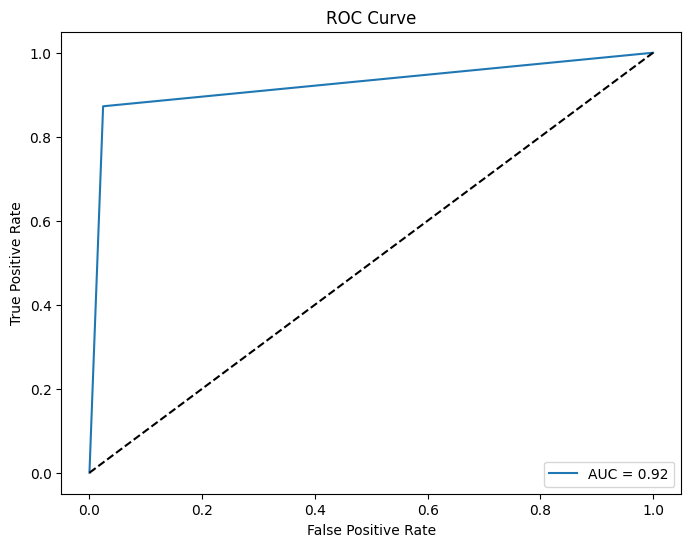

In [20]:
# prompt: Also calculate the MAE and AUC_ROC curve

from sklearn.metrics import mean_absolute_error, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate AUC-ROC
try:
  auc_roc = roc_auc_score(y_test, y_pred)
  print(f"AUC-ROC: {auc_roc}")

  #Plot the ROC Curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='lower right')
  plt.show()
except ValueError:
  print("Could not calculate AUC-ROC. Check if y_pred contains only 0 and 1.")


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2271
           1       0.93      0.89      0.91      2282

    accuracy                           0.91      4553
   macro avg       0.91      0.91      0.91      4553
weighted avg       0.91      0.91      0.91      4553

Mean Absolute Error (MAE): 0.0871952558752471
AUC-ROC: 0.9128525233954315


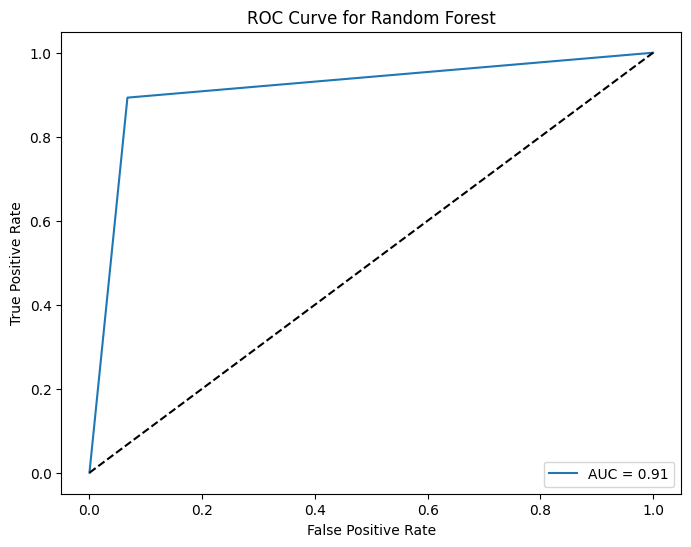

In [21]:
# prompt: make a random forest model.

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1)  # You can adjust hyperparameters here
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))

# Calculate MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error (MAE): {mae_rf}")

# Calculate AUC-ROC
try:
  auc_roc_rf = roc_auc_score(y_test, y_pred_rf)
  print(f"AUC-ROC: {auc_roc_rf}")

  #Plot the ROC Curve
  fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_roc_rf:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve for Random Forest')
  plt.legend(loc='lower right')
  plt.show()
except ValueError:
  print("Could not calculate AUC-ROC. Check if y_pred contains only 0 and 1.")
